# Proyecto 2
Todas las preguntas tienen el mismo peso en esta tarea. Esta tarea requiere más aprendizaje individual. Te invito a consultar la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/) para encontrar funciones o métodos que quizás no has usado aún, o realices preguntas en [Stack Overflow](https://stackoverflow.com/) y etiquételos como relacionados con pandas y python. Todas las preguntas tienen la misma cantidad de puntos, excepto la pregunta 1, que vale el 20 % de la calificación de la tarea.

**Nota**: A partir de la pregunta 2 se basan en la respuesta de la pregunta 1.

In [179]:
import pandas as pd
import numpy as np


# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings

from jupyter_core.migrate import regex

warnings.filterwarnings('ignore')

### Pregunta 1
Cargue los datos de energía del archivo `assets/Energy Indicators.xls`, que es una lista de indicadores de [suministro de energía y producción de electricidad renovable](assets/Energy%20Indicators.xls) de las [Naciones Unidas](https://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) para el año 2013, y asigna esos datos a un DataFrame con el nombre de variable **energy**.

Ten en cuenta que este es un archivo de Excel y no un archivo de valores separados por comas (.csv). Además, asegúrate de excluir la información del pie de página y del encabezado del archivo de datos. Las primeras dos columnas son innecesarias, por lo que debes deshacerse de ellas. También debes cambiar las etiquetas de las columnas para que las columnas sean las siguientes:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convierta `Energy Supply` a gigajulios (**Nota: hay 1,000,000 giga julios en un petajulio**). Para todos los países que carezcan de datos (por ejemplo, datos con "..."), asegúrese de que estos reflejen valores `np.NaN`.

Cambia el nombre de los siguientes países según este listado (nos servirá para preguntas posteriores):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

También hay varios países que contienen paréntesis en su nombre. Asegúrete de eliminarlos, por ejemplo: `'Bolivia (Estado Plurinacional de)'` debería ser `'Bolivia'`.

A continuación, carga los datos del GDP (PBI) del archivo `assets/world_bank.csv`. Este es un archivo .csv del [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) que contiene el PBI de los países desde 1960 hasta 2015. Llame a este DataFrame **gdp**.

Asegúrete de omitir el encabezado y cambia el nombre de la siguiente lista de países:

```
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
```

Finalmente, lee el [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](https://www.scimagojr.com/countryrank.php?category=2102) desde el archivo `assets/scimagojr-3.xlsx`, que clasifica a los paises según sus contribuciones al área mencionada. Denomina este DataFrame con el nombre **sciamgo**.

Unifica los tres datasets: GDP, Energy, y ScimEn en un nuevo dataset (utilizando la intersección de los nombres de países). Utiliza solo los años del 2006 al 2015 de datos de GDP (PBI) y solo los 15 principales países según el ranking de Scimagojr 'Rank' (del 1 al 15).

El índice de este DataFrame debe ser el nombre de los países, y las columnas deben ser ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

*Esto debería devolver un DataFrame con 20 columnas y 15 entradas, y las filas del DataFrame deberían estar ordenadas por "Rank".*


In [180]:
# Escribe aquí tu código
country_rename = {"Republic of Korea": "South Korea",
                  "United States of America": "United States",
                  "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                  "China, Hong Kong Special Administrative Region": "Hong Kong"}

energy = pd.read_excel("assets/Energy indicators.xls", header=17, usecols="C:F",
                       names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                       converters={1: lambda x: x * 1000000 if x != "..." else None},
                       na_values=["..."]).replace(country_rename, regex=True)

# Sacarle los paréntesis
energy['Country'] = energy['Country'].str.replace(r'\s*\([^)]*\)', '', regex=True)
energy.set_index("Country", inplace=True)
energy

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650
...,...,...,...
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [181]:
country_rename = {"Korea, Rep.": "South Korea",
                  "Iran, Islamic Rep.": "Iran",
                  "Hong Kong SAR, China": "Hong Kong"}

gdp = pd.read_csv("assets/world_bank.csv", header=4, ).replace(country_rename, regex=True)
gdp.rename(columns={"Country Name": "Country"}, inplace=True)
gdp.set_index("Country", inplace=True)
gdp


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,1.120109e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,1.803656e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10


In [182]:
sciamgo = pd.read_excel("assets\scimagojr-3.xlsx")
sciamgo = sciamgo.set_index("Country")
sciamgo = sciamgo.iloc[0:15]
sciamgo

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [183]:
# definimos los nombres de las columnas
col_energy = ['Energy Supply', 'Energy Supply per Capita', '% Renewable']
col_gdp = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"] 
col_sci = ["Rank", "Documents", "Citable documents", "Citations", "Self-citations", "Citations per document", "H index"]

df1 = pd.merge(gdp, sciamgo, how="inner", left_index=True, right_index=True) 
df2 = pd.merge(energy, df1, how="inner", left_index=True, right_index=True)

df = df2[col_sci + col_energy + col_gdp]
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


### Pregunta 2
La pregunta anterior unió tres datasets y luego los redujo a las 15 entradas principales. Pero antes de reducirlos a los 15 elementos principales, ¿cuántas entradas se perdieron?

*Esta función debería devolver un solo número.*

In [184]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Todo menos esto!</text>
</svg>

In [185]:
df1_outer = pd.merge(gdp, energy, how="outer", left_index=True, right_index=True)
df2_outer = pd.merge(sciamgo, df1_outer, how="outer", left_index=True, right_index=True)

perdidos = len(df2_outer) - len(df2)
len(df2_outer), len(df2), perdidos

(362, 7, 355)

### Pregunta 3
¿Cuáles son los 15 países con mayor GDP (PBI) promedio en los últimos 10 años?

*Esta función debería devolver una serie llamada `avgGDP` con 15 países y su GDP (PBI) promedio ordenado en orden descendente.*

In [186]:
avg_gdp = df[col_gdp].mean(axis=1).sort_values(ascending=False)
avg_gdp

Country
Germany               3.493025e+12
Brazil                2.189794e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Pregunta 4
¿Cuánto cambió el GDP (PBI) durante el lapso de 10 años para el país con el sexto GDP (PBI) promedio más grande?

*Esta función debería devolver un solo número.*

In [187]:
pais_sexto= avg_gdp.sort_values(ascending=False)
sexto = pais_sexto.keys()[5]
sexto

sexto_2006 = df.loc[sexto]["2006"]
sexto_2006

sexto_2015 = df.loc[sexto]["2015"]
sexto_2015

cambio = sexto_2015 - sexto_2006
cambio.item()

325560528159.9851

### Pregunta 5
¿Cuál es el suministro medio de energía per cápita (`Energy Supply per Capita`)?

*Esta función debería devolver un solo número.*

In [188]:
mean_energy_supply_per_capita = df['Energy Supply per Capita'].mean()
mean_energy_supply_per_capita.item()

157.14285714285714

### Pregunta 6
¿Qué país tiene el máximo `% Renewable` y cuál es el porcentaje?

*Esta función debe devolver una tupla con el nombre del país y el porcentaje.*

In [189]:
max_renewable_index = df['% Renewable'].idxmax()

country_with_max_renewable = df['% Renewable'].idxmax()
max_renewable_percentage = df.loc[country_with_max_renewable, '% Renewable']

result = (country_with_max_renewable, max_renewable_percentage.item())
result

('Brazil', 69.64803)

### Pregunta 7
Cree una nueva columna que sea la relación entre `Self-Citations` y `Total Citations`.
¿Cuál es el valor máximo para esta nueva columna y qué país tiene la relación más alta?

*Esta función debe devolver una tupla con el nombre del país y el ratio (proporción).*

In [190]:
df['Citation_Ratio'] = df['Self-citations'] / df['Citations']

max_ratio_row = df['Citation_Ratio'].idxmax()
max_ratio_value = df.loc[max_ratio_row, 'Citation_Ratio']

result = (max_ratio_row, max_ratio_value.item())
result

('Russian Federation', 0.36251678048211056)

### Pregunta 8

Crea una columna que estime la población utilizando `Energy Supply` y `Energy Supply per capita`.
¿Cuál es el tercer país más poblado según esta estimación?

*Esta función debería devolver el nombre del país*

In [191]:
df["Población estimada"] = df["Energy Supply"] / df["Energy Supply per Capita"]

# Ordenar los países por población estimada en orden descendente y seleccionar el tercer país más poblado
tercer_pais_mas_poblado= df["Población estimada"].sort_values(ascending=False).keys()[2]
tercer_pais_mas_poblado


'Russian Federation'

### Pregunta 9
Crea una columna que estime el número de `Citable documents` por persona.
¿Cuál es la correlación entre el número de `Citable documents` per cápita y el `Energy Supply per Capita`? Utiliza el método `.corr()`, (correlación de Pearson).

*Esta función debería devolver un solo número.*

*(Opcional: utiliza la función `plot9()` para visualizar la relación entre el suministro de energía per cápita y los `Citable documents` per cápita)*

In [192]:
df['Citable documents per capita'] = df['Citable documents'] / df['Energy Supply per Capita']
correlacion = df['Citable documents per capita'].corr(df['Energy Supply per Capita'])
print("Correlación:", correlacion)

Correlación: -0.70049738645213


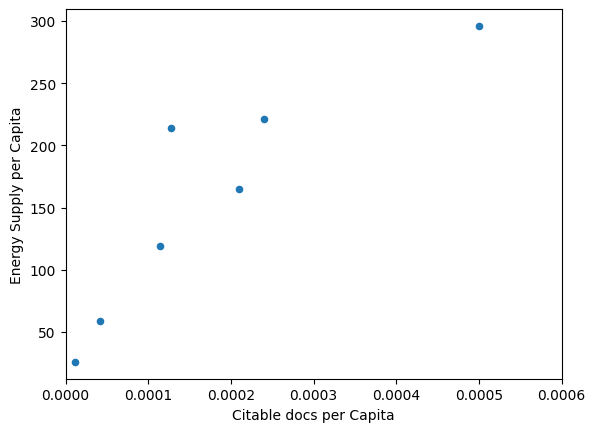

In [193]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    top15 = df  
    top15['PopEst'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable docs per Capita'] = top15['Citable documents'] / top15['PopEst']
    top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

### Pregunta 10
Crea una nueva columna con un valor igual a 1 si el valor de % de energía renovable del país (`% Renewable`) es igual o superior de la mediana de todos los países en el top 15, o con un valor igual a 0 si el valor de % de energía renovable del país (`% Renewable`) está por debajo de la mediana.

*Esta función debería devolver una serie llamada `HighRenew` cuyo índice es el nombre del país ordenado ascendentemente según el ranking.*

In [194]:
top_15 = df.nlargest(15, 'Rank') 
mediana_renewable = top_15['% Renewable'].median()

df['HighRenew'] = (df['% Renewable'] >= mediana_renewable).astype(int)

#Índice ordenado por nombre del país
HighRenew = df['HighRenew'].sort_index()
HighRenew

Country
Brazil                1
Canada                1
Germany               1
India                 0
Iran                  0
Russian Federation    1
South Korea           0
Name: HighRenew, dtype: int64

### Pregunta 11
Utiliza el siguiente diccionario para agrupar los países por continente, luego crea un DataFrame que muestre el tamaño de la muestra (la cantidad de países en cada contenedor de continente) y la suma, la media y la desviación estándar para la población estimada de cada país.

```python
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}
```

*Esta función debería devolver un DataFrame con un índice llamado Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` y columnas `['size', 'sum', 'mean', 'std']`*

In [195]:
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}

continents = pd.DataFrame([continent_dict])
continents.rename(index = {0:"Continent"}, inplace=True)
continents = continents.T
continents

,Continent
China,Asia
United States,North America
Japan,Asia
United Kingdom,Europe
Russian Federation,Europe
Canada,North America
Germany,Europe
India,Asia
France,Europe
South Korea,Asia


In [196]:
df["pop_est"] = df["Energy Supply"] / df["Energy Supply per Capita"]
df["Citable docs per capita"] = df["Citable documents"] / df["pop_est"]
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2014,2015,Citation_Ratio,Población estimada,Citable documents per capita,PopEst,Citable docs per Capita,HighRenew,pop_est,Citable docs per capita
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.412231e+12,2.319423e+12,0.237159,2.059153e+08,145.694915,2.059153e+08,0.000042,1,2.059153e+08,0.000042
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,59.527027,3.523986e+07,0.000500,1,3.523986e+07,0.000500
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,102.006061,8.036970e+07,0.000209,1,8.036970e+07,0.000209
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,570.807692,1.276731e+09,0.000012,0,1.276731e+09,0.000012
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,...,4.639027e+11,NaN,0.332782,7.707563e+07,74.109244,7.707563e+07,0.000114,0,7.707563e+07,0.000114
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.234340e+12,1.266580e+12,0.197035,4.980543e+07,53.950226,4.980543e+07,0.000239,0,4.980543e+07,0.000239
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,85.518692,1.435000e+08,0.000128,1,1.435000e+08,0.000128


In [197]:
df_11 = pd.merge(df, continents, how = "inner", left_index=True, right_index=True)
df_11

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2015,Citation_Ratio,Población estimada,Citable documents per capita,PopEst,Citable docs per Capita,HighRenew,pop_est,Citable docs per capita,Continent
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.319423e+12,0.237159,2.059153e+08,145.694915,2.059153e+08,0.000042,1,2.059153e+08,0.000042,South America
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.792609e+12,0.190369,3.523986e+07,59.527027,3.523986e+07,0.000500,1,3.523986e+07,0.000500,North America
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.685556e+12,0.195111,8.036970e+07,102.006061,8.036970e+07,0.000209,1,8.036970e+07,0.000209,Europe
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.367206e+12,0.288973,1.276731e+09,570.807692,1.276731e+09,0.000012,0,1.276731e+09,0.000012,Asia
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,...,NaN,0.332782,7.707563e+07,74.109244,7.707563e+07,0.000114,0,7.707563e+07,0.000114,Asia
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.266580e+12,0.197035,4.980543e+07,53.950226,4.980543e+07,0.000239,0,4.980543e+07,0.000239,Asia
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.616149e+12,0.362517,1.435000e+08,85.518692,1.435000e+08,0.000128,1,1.435000e+08,0.000128,Europe


In [198]:
df_11_continents = df_11[["Continent", "pop_est"]].groupby(["Continent"]).agg(["size", "sum", "mean", "std"])
df_11_continents

pop_est                                          
                 size           sum          mean           std
Continent                                                      
Asia                3  1.403612e+09  4.678706e+08  7.006261e+08
Europe              2  2.238697e+08  1.119348e+08  4.463987e+07
North America       1  3.523986e+07  3.523986e+07           NaN
South America       1  2.059153e+08  2.059153e+08           NaN

In [199]:
df11_continent = df11[["Continent", "pop_est"]].groupby(["Continent"]).agg(["size", "sum", "mean", "std"])
df11_continent

pop_est                                          
                 size           sum          mean           std
Continent                                                      
Asia                3  1.403612e+09  4.678706e+08  7.006261e+08
Europe              2  2.238697e+08  1.119348e+08  4.463987e+07
North America       1  3.523986e+07  3.523986e+07           NaN
South America       1  2.059153e+08  2.059153e+08           NaN

### Optional

Puedes ejecutar la función `plot_optional()` para ver un ejemplo de visualización.

ValueError: 'c' argument has 15 elements, which is inconsistent with 'x' and 'y' with size 7.

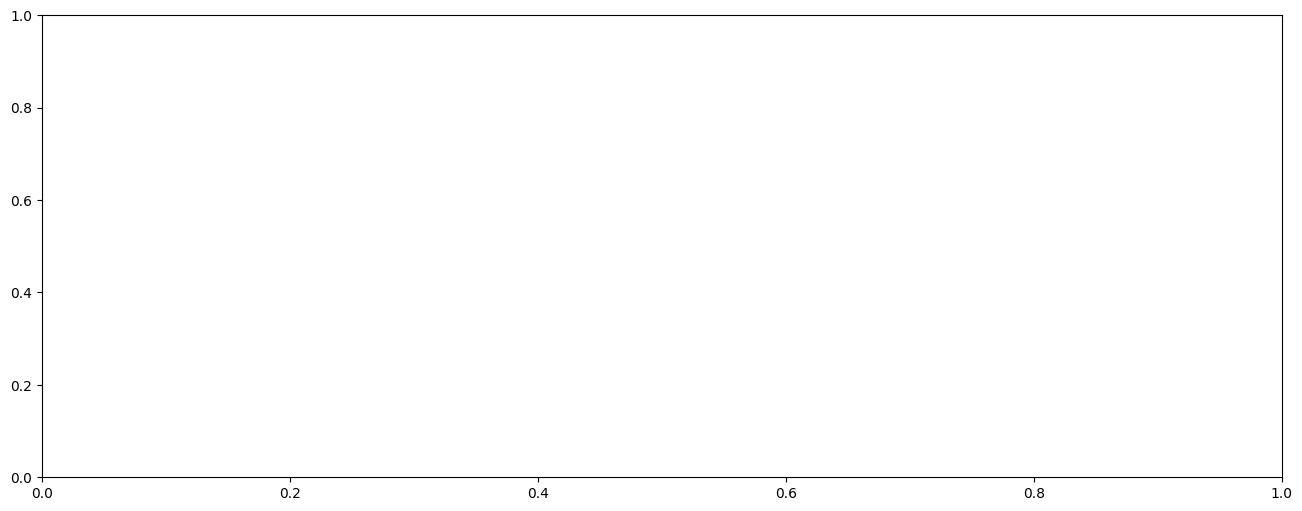

In [200]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    ax = top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c', '#377eb8', '#e41a1c', '#4daf4a',
                       '#4daf4a', '#377eb8', '#4daf4a', '#e41a1c',
                       '#4daf4a', '#e41a1c', '#4daf4a', '#4daf4a',
                       '#e41a1c', '#dede00', '#ff7f00'],
                    xticks=range(1, 16), s=6 * top15['2014'] / 10 ** 10,
                    alpha=.75, figsize=[16, 6])

    for i, txt in enumerate(top15.index):
        ax.annotate(txt, [top15['Rank'][i], top15['% Renewable'][i]], ha='center')

    print(
        """Este es un ejemplo de visualización realizado para ayudarte a comprender los datos. \nEste es un gráfico de burbujas que muestra el % Renewable vs. Rank. \nEl tamaño de la burbuja corresponde al GDP (PIB) de 2014 de los países, y el color corresponde al continente.""")


plot_optional()